# Regresión Lineal 

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sympy.solvers import solve
from sympy import Symbol
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
Datos = pd.read_csv('Car details v3.csv')

In [98]:
Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [99]:
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Idenficación de Datos faltas y atípicos')

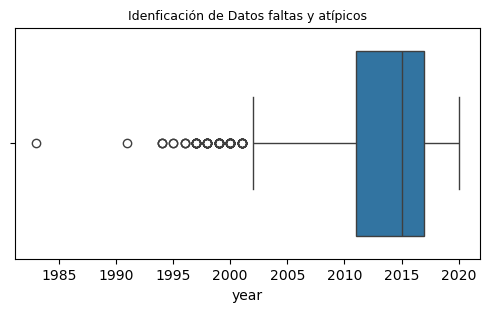

In [100]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['year'])
plt.title('Idenficación de Datos faltas y atípicos', fontsize=9)

In [101]:
print("Cantidad de registros con cero en nombre: ",Datos['name'].isnull().sum())
print("Cantidad de registros con cero en año: ",Datos['year'].isnull().sum())
print("Cantidad de registros con cero en precio de venta: ",Datos['selling_price'].isnull().sum())
print("Cantidad de registros con cero en km impulsado: ",Datos['km_driven'].isnull().sum())
print("Cantidad de registros con cero en combustible: ",Datos['fuel'].isnull().sum())
print("Cantidad de registros con cero en tipo vendedor: ",Datos['seller_type'].isnull().sum())
print("Cantidad de registros con cero en transmisión: ",Datos['transmission'].isnull().sum())
print("Cantidad de registros con cero en dueño: ",Datos['owner'].isnull().sum())
print("Cantidad de registros con cero en kilometraje: ",Datos['mileage'].isnull().sum())
print("Cantidad de registros con cero en motor: ",Datos['engine'].isnull().sum())
print("Cantidad de registros con cero en máximo poder: ",Datos['max_power'].isnull().sum())
print("Cantidad de registros con cero en esfuerzo de torsión: ",Datos['torque'].isnull().sum())
print("Cantidad de registros con cero en asientos: ",Datos['seats'].isnull().sum())

Cantidad de registros con cero en nombre:  0
Cantidad de registros con cero en año:  0
Cantidad de registros con cero en precio de venta:  0
Cantidad de registros con cero en km impulsado:  0
Cantidad de registros con cero en combustible:  0
Cantidad de registros con cero en tipo vendedor:  0
Cantidad de registros con cero en transmisión:  0
Cantidad de registros con cero en dueño:  0
Cantidad de registros con cero en kilometraje:  221
Cantidad de registros con cero en motor:  221
Cantidad de registros con cero en máximo poder:  215
Cantidad de registros con cero en esfuerzo de torsión:  222
Cantidad de registros con cero en asientos:  221


In [102]:
Datos['mileage'] = Datos['mileage'].fillna(0)
Datos['engine'] = Datos['engine'].fillna(0)
Datos['max_power'] = Datos['max_power'].fillna(0)
Datos['torque'] = Datos['torque'].fillna(0)
Datos['seats'] = Datos['seats'].fillna(0)

In [103]:
Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [104]:
print("Cantidad de registros con cero en nombre: ",Datos['name'].isnull().sum())
print("Cantidad de registros con cero en año: ",Datos['year'].isnull().sum())
print("Cantidad de registros con cero en precio de venta: ",Datos['selling_price'].isnull().sum())
print("Cantidad de registros con cero en km impulsado: ",Datos['km_driven'].isnull().sum())
print("Cantidad de registros con cero en combustible: ",Datos['fuel'].isnull().sum())
print("Cantidad de registros con cero en tipo vendedor: ",Datos['seller_type'].isnull().sum())
print("Cantidad de registros con cero en transmisión: ",Datos['transmission'].isnull().sum())
print("Cantidad de registros con cero en dueño: ",Datos['owner'].isnull().sum())
print("Cantidad de registros con cero en kilometraje: ",Datos['mileage'].isnull().sum())
print("Cantidad de registros con cero en motor: ",Datos['engine'].isnull().sum())
print("Cantidad de registros con cero en máximo poder: ",Datos['max_power'].isnull().sum())
print("Cantidad de registros con cero en esfuerzo de torsión: ",Datos['torque'].isnull().sum())
print("Cantidad de registros con cero en asientos: ",Datos['seats'].isnull().sum())

Cantidad de registros con cero en nombre:  0
Cantidad de registros con cero en año:  0
Cantidad de registros con cero en precio de venta:  0
Cantidad de registros con cero en km impulsado:  0
Cantidad de registros con cero en combustible:  0
Cantidad de registros con cero en tipo vendedor:  0
Cantidad de registros con cero en transmisión:  0
Cantidad de registros con cero en dueño:  0
Cantidad de registros con cero en kilometraje:  0
Cantidad de registros con cero en motor:  0
Cantidad de registros con cero en máximo poder:  0
Cantidad de registros con cero en esfuerzo de torsión:  0
Cantidad de registros con cero en asientos:  0


Text(0.5, 1.0, 'Idenficación de Datos faltas y atípicos')

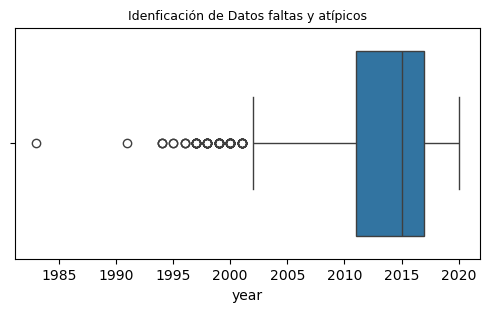

In [105]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['year'])
plt.title('Idenficación de Datos faltas y atípicos', fontsize=9)

In [106]:
nivel_minimo=1900
nivel_maximo=2000
Total_atipicos=((Datos['year']<nivel_minimo)|(Datos['year']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_atipicos))

El total de datos atípicos es 8057


In [107]:
Datos = Datos[(Datos['year']<nivel_maximo)&(Datos['year']>nivel_minimo)]


In [110]:
Total_atipicos=((Datos['year']<nivel_minimo)|(Datos['year']>nivel_maximo)).sum()
print ("El total de datos atípicos es {}".format(Total_atipicos))

El total de datos atípicos es 0


In [111]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 177 to 8115
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           49 non-null     object 
 1   year           49 non-null     int64  
 2   selling_price  49 non-null     int64  
 3   km_driven      49 non-null     int64  
 4   fuel           49 non-null     object 
 5   seller_type    49 non-null     object 
 6   transmission   49 non-null     object 
 7   owner          49 non-null     object 
 8   mileage        49 non-null     object 
 9   engine         49 non-null     object 
 10  max_power      49 non-null     object 
 11  torque         49 non-null     object 
 12  seats          49 non-null     float64
dtypes: float64(1), int64(3), object(9)
memory usage: 5.4+ KB


In [115]:
Datos['selling_price'].value_counts()


selling_price
40000     6
70000     6
80000     4
55000     4
50000     4
45000     3
160000    2
60000     2
300000    2
150000    2
99000     1
58000     1
42000     1
57000     1
125000    1
29999     1
210000    1
68000     1
155000    1
78000     1
52000     1
120000    1
163000    1
35000     1
Name: count, dtype: int64

In [116]:
Datos = Datos[['selling_price', 'km_driven', 'seats', 'year']]

In [117]:
X = Datos.drop('selling_price',axis=1)
Y = Datos['selling_price']

In [118]:
X.head(50)

,km_driven,seats,year
177,40000,4.0,1999
316,10000,0.0,1983
774,110000,0.0,1999
999,60000,4.0,1999
1216,5000,0.0,1996
1432,100000,0.0,1994
1468,100000,4.0,1999
1474,60000,4.0,1994
1815,90000,0.0,1995
2327,70000,5.0,1998


In [119]:
Y.head(50)

177      40000
316     300000
774      80000
999      55000
1216    163000
1432    120000
1468     52000
1474     45000
1815    160000
2327     80000
2340     50000
2424     60000
3046     45000
3097     60000
3310     78000
3890     55000
3922    210000
4108     40000
4253    155000
4285     70000
4372     68000
4542     70000
4712     99000
5080     80000
5322     55000
5349    150000
5385    160000
5411     50000
5610     70000
5702     70000
5714     29999
5726    125000
6164     50000
6320     40000
6387     45000
6436     55000
6521     40000
6639     80000
6730     57000
6919     70000
6920     70000
6933     42000
7218     50000
7471    150000
7765     58000
7935     40000
8025     35000
8042    300000
8115     40000
Name: selling_price, dtype: int64

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state= 0)

In [121]:
print (X_train)

      km_driven  seats  year
5411     110000    4.0  1997
8115     120000    4.0  1997
774      110000    0.0  1999
8025      40000    4.0  1998
4253     100000    5.0  1999
3890      70000    4.0  1995
5610      40000    5.0  1998
4712     100000    5.0  1994
3922      47990    0.0  1998
6933      70000    4.0  1996
4372     110000    5.0  1998
7218      60000    4.0  1997
1815      90000    0.0  1995
3097     140000    0.0  1999
5349     198000    5.0  1999
1432     100000    0.0  1994
4108      32000    4.0  1996
6436      50000    5.0  1998
3310      80000    0.0  1999
6730     110000    0.0  1997
316       10000    0.0  1983
3046      80000    4.0  1998
7471     198000    5.0  1999
5322     120000    0.0  1991
1468     100000    4.0  1999
5080      80000    4.0  1999
6521      50000    4.0  1999
4542     100000    0.0  1999
4285     100000    4.0  1998
2327      70000    5.0  1998
6919      65000    5.0  1999
7935     100000    4.0  1999
999       60000    4.0  1999
177       4000

In [122]:
print (Y_train)

5411     50000
8115     40000
774      80000
8025     35000
4253    155000
3890     55000
5610     70000
4712     99000
3922    210000
6933     42000
4372     68000
7218     50000
1815    160000
3097     60000
5349    150000
1432    120000
4108     40000
6436     55000
3310     78000
6730     57000
316     300000
3046     45000
7471    150000
5322     55000
1468     52000
5080     80000
6521     40000
4542     70000
4285     70000
2327     80000
6919     70000
7935     40000
999      55000
177      40000
8042    300000
7765     58000
Name: selling_price, dtype: int64


In [123]:
modelo_regresion = LinearRegression()
modelo_regresion.fit (X_train , Y_train)

Prediccion = modelo_regresion.predict(X_test)

In [124]:
print (Y_test)

5702     70000
1216    163000
5385    160000
5714     29999
6164     50000
6639     80000
6387     45000
6920     70000
1474     45000
2340     50000
2424     60000
5726    125000
6320     40000
Name: selling_price, dtype: int64


In [125]:
print (Prediccion)

[100061.61710076  48035.50066619  87907.48954931  86626.71337407
 108634.86980686  32297.00215182  75266.85181129  58760.7344867
 112814.78309188  53258.69537851  56365.498279    96760.39363584
  68727.29162115]


In [126]:
from sklearn import metrics
print('El error absoluto medio del modelo es:', metrics.mean_absolute_error(Y_test, Prediccion))
print('El Error Cuadrático Medio del modelo es:', metrics.mean_squared_error(Y_test, Prediccion))
print('El error cuadratico medio del modelo es:', np.sqrt(metrics.mean_squared_error(Y_test, Prediccion)))

El error absoluto medio del modelo es: 42558.86180120449
El Error Cuadrático Medio del modelo es: 2732769110.7138357
El error cuadratico medio del modelo es: 52275.894164651414


Text(0, 0.5, 'Prediccion')

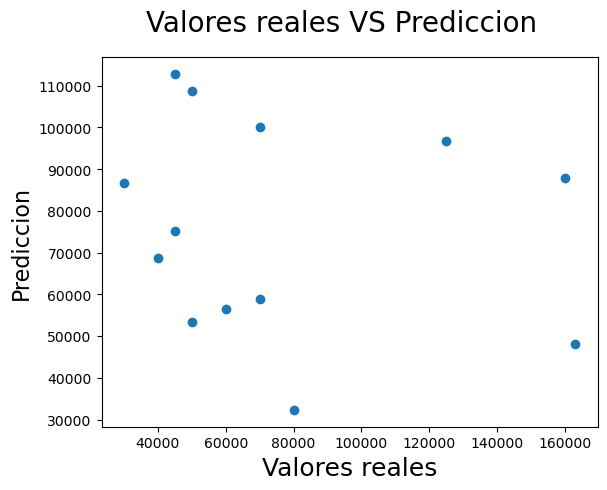

In [128]:
fig = plt.figure()
plt.scatter(Y_test, Prediccion)
fig.suptitle('Valores reales VS Prediccion', fontsize=20)
plt.xlabel('Valores reales', fontsize=18)
plt.ylabel('Prediccion', fontsize=16)